# Analytical results for a Fokker–Planck equation in the small noise limit

Author of paper: Eric Lutz

Link to paper: https://pubs.aip.org/aapt/ajp/article-abstract/73/10/968/1042378/Analytical-results-for-a-Fokker-Planck-equation-in?redirectedFrom=fulltext

Notebook by: [Óscar Amaro](https://github.com/OsAmaro) (Oct 2024)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from numpy import log, log10, sin, cos, exp, sqrt, pi, heaviside
from tqdm import trange
from scipy.interpolate import interp1d
from scipy.integrate import quad
from scipy.linalg import expm
from scipy.special import lambertw

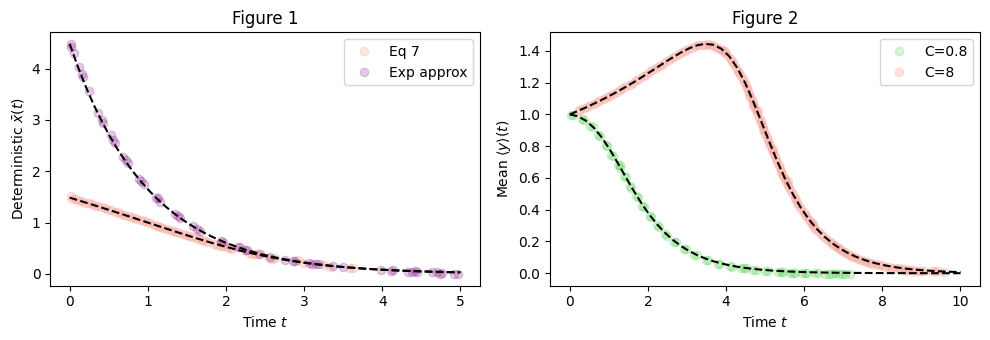

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,3.5))
alphaWPD = 0.2
widthWPD = 4
#
f = open('dataWPD/fig1/wpd.json')
data = json.load(f)
datatmp = data['datasetColl'][0]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[0].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'o', alpha=alphaWPD, linewidth=widthWPD, color='salmon', label='Eq 7')
#
datatmp = data['datasetColl'][1]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[0].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'o', alpha=alphaWPD, linewidth=widthWPD, color='purple', label='Exp approx')


#
f = open('dataWPD/fig2/wpd.json')
data = json.load(f)
datatmp = data['datasetColl'][0]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[1].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'o', alpha=alphaWPD, linewidth=widthWPD, color='LimeGreen', label=r'C=0.8')
#
datatmp = data['datasetColl'][1]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[1].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'o', alpha=alphaWPD, linewidth=widthWPD, color='salmon', label=r'C=8')

# 1
t = np.linspace(0,5)
def xdet(t, C):
    return sqrt(np.real(lambertw(np.exp(-2 * t + C))))
axes[0].plot(t, xdet(t,3), 'k--')
axes[0].plot(t, exp(-t + 3/2), 'k--')

# Average contribution of the noise (Figure 2)
t = np.linspace(0,10)
def K(v):
    return -v/(1+v**2)
def v_deterministic(t, C):
    return np.sqrt(np.real(lambertw(np.exp(-2 * t + C))))
def noise_contribution(t, v0, C):
    v_t = v_deterministic(t, C)
    return K(v_t) / K(v0)
# Plot noise contribution for two different initial conditions
C1, C2 = 0.8, 8  # Two different values for the initial constant
# For C1
v0_1 = sqrt(np.real(lambertw(exp(C1))))  # Initial velocity for C1
y1 = noise_contribution(t, v0_1, C1)
# For C2
v0_2 = sqrt(np.real(lambertw(exp(C2))))  # Initial velocity for C2
y2 = noise_contribution(t, v0_2, C2)
axes[1].plot(t, y1, 'k--')
axes[1].plot(t, y2, 'k--')


axes[0].set_xlabel(r'Time $t$')
axes[1].set_xlabel(r'Time $t$')
axes[0].set_ylabel(r'Deterministic $\bar{x} (t)$')
axes[1].set_ylabel(r'Mean $\langle y \rangle (t)$')
axes[0].set_title(r'Figure 1')
axes[1].set_title(r'Figure 2')
axes[0].legend()
axes[1].legend()
plt.tight_layout()
plt.show()

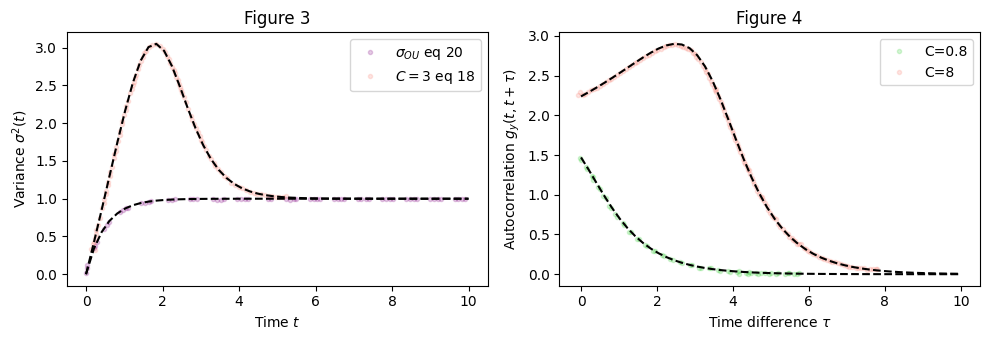

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,3.5))
alphaWPD = 0.2
widthWPD = 4
#
f = open('dataWPD/fig3/wpd.json')
data = json.load(f)
datatmp = data['datasetColl'][0]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[0].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'.', alpha=alphaWPD, linewidth=widthWPD, color='purple', label=r'$\sigma_{OU}$ eq 20')
#
datatmp = data['datasetColl'][1]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[0].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'.', alpha=alphaWPD, linewidth=widthWPD, color='salmon', label=r'$C=3$ eq 18')


#
f = open('dataWPD/fig4/wpd.json')
data = json.load(f)
datatmp = data['datasetColl'][0]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[1].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'.', alpha=alphaWPD, linewidth=widthWPD, color='LimeGreen', label=r'C=0.8')
#
datatmp = data['datasetColl'][1]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[1].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'.', alpha=alphaWPD, linewidth=widthWPD, color='salmon', label=r'C=8')



t = np.linspace(0,10)
axes[0].plot(t, 1-exp(-2*t), 'k--') #OU approximation eq 20
def eq18(t,C):
    vbar = v_deterministic(t, C)
    v0 = sqrt(np.real(lambertw(exp(C))))  # Initial velocity for C1
    return 0.5*( 2*vbar**(-2) + (v0**4 + 12*t-2*v0**-2) - vbar**4) * K(vbar)**2
axes[0].plot(t, eq18(t,3), 'k--') #OU approximation eq 20

def gyts(t, s, C):
    sy2 = eq18(t,C)
    vbars = v_deterministic(s,C)
    vbart = v_deterministic(t,C)
    return sy2 * K(vbars) / K(vbart)
axes[1].plot(t, gyts(1,1+t,8), 'k--') #eq 24
axes[1].plot(t, gyts(1,1+t,0.8), 'k--')

axes[0].set_xlabel(r'Time $t$')
axes[1].set_xlabel(r'Time difference $\tau$')
axes[0].set_ylabel(r'Variance $\sigma^2 (t)$')
axes[1].set_ylabel(r'Autocorrelation $g_y(t,t+\tau)$')
axes[0].set_title(r'Figure 3')
axes[1].set_title(r'Figure 4')
axes[0].legend()
axes[1].legend()
plt.tight_layout()
plt.show()